# Discretization
Data discretization is a preprocessing technique used to transform continuous or numerical data into discrete categories or bins. This process can be particularly useful for machine learning algorithms that handle categorical data more effectively than continuous data. It can also help to improve model interpretability and handle outliers more robustly.



In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# count the missing values
df.isna().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
# impute missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [4]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

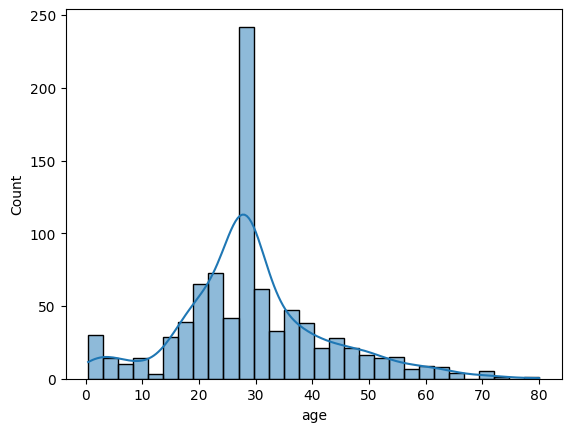

In [8]:
sns.histplot(df['age'], kde=True)


In [11]:
# age discretizer
age_dicretizer= KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
#lables the bins based on age
df['age_bines'] = age_dicretizer.fit_transform(df[['age']])
df.head()

e:\DataScienceLearning\envs\python_ml_ds\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bines
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


<Axes: xlabel='age', ylabel='Count'>

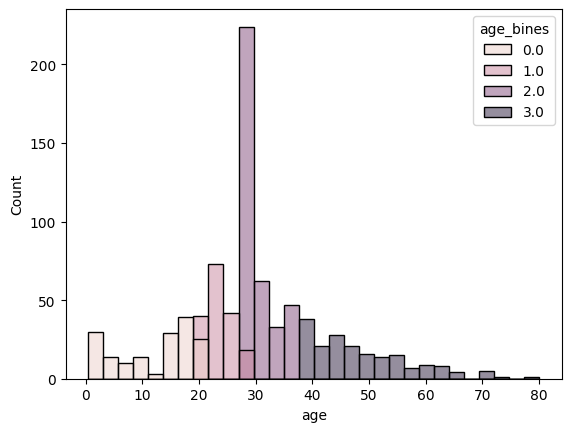

In [16]:
sns.histplot(df, x='age', hue='age_bines')

<Axes: xlabel='age', ylabel='Count'>

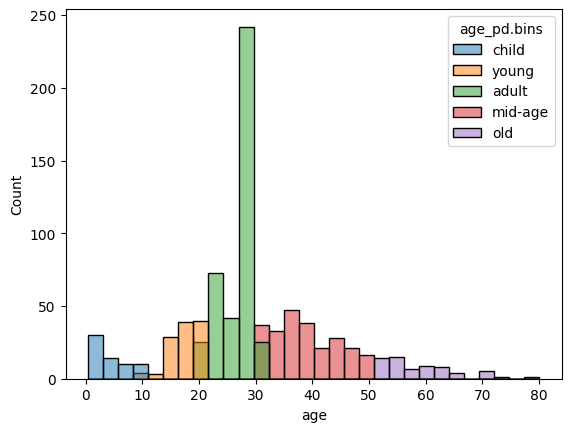

In [33]:
# Lets do the same thing in Pandas
    #d define the bins
bines = [0,10,20,30,50,80]
lables=['child', 'young', 'adult', 'mid-age', 'old']
df['age_pd.bins']=pd.cut(df['age'],bins=bines,labels=lables)

sns.histplot(df, x='age', hue='age_pd.bins')

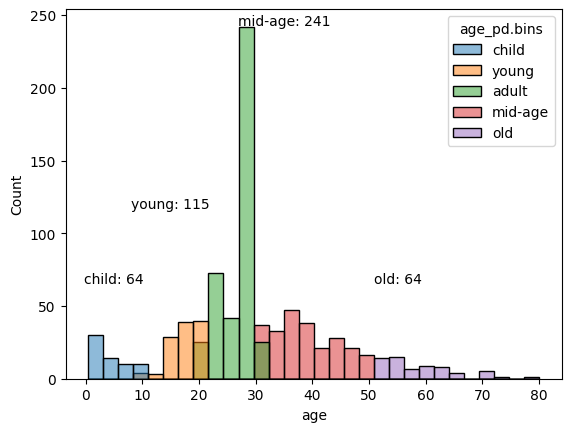

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins
bins = [0, 10, 20, 30, 50, 80]
labels = ['child', 'young', 'adult', 'mid-age', 'old']

# Create the 'age_pd.bins' column
df['age_pd.bins'] = pd.cut(df['age'], bins=bins, labels=labels)

# Count the occurrences of each category
count_df = df['age_pd.bins'].value_counts().sort_index()

# Create the histogram plot
ax = sns.histplot(data=df, x='age', hue='age_pd.bins')

# Add count annotations to the plot
for i, count in enumerate(count_df):
    category = count_df.index[i]
    ax.annotate(f'{category}: {count}', xy=(bins[i] + 5, count), ha='center', va='bottom')

# Show the plot
plt.show()